In [319]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [320]:
response = requests.get("https://api.covid19api.com/all").json()

In [321]:
data=pd.DataFrame(response)

In [322]:
data

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-22T00:00:00Z
1,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-23T00:00:00Z
2,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-24T00:00:00Z
3,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-25T00:00:00Z
4,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-26T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
365555,Zimbabwe,ZW,,,,-19.02,29.15,40,4,5,31,2020-04-30T00:00:00Z
365556,Zimbabwe,ZW,,,,-19.02,29.15,40,4,5,31,2020-05-01T00:00:00Z
365557,Zimbabwe,ZW,,,,-19.02,29.15,34,4,5,25,2020-05-02T00:00:00Z
365558,Zimbabwe,ZW,,,,-19.02,29.15,34,4,5,25,2020-05-03T00:00:00Z


In [323]:
#Checking if 'Active' column has any useful values
data[data['Active'].isnull()==True]["Active"].size

0

In [324]:
#Removing Time from Date Column
for row in range(0, data.shape[0]):   
    data['Date'][row]= data['Date'][row].split('T')[0]

C:\Users\anura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [325]:
#Dropping Active column along with Province, City and CityCode
data=data.drop(columns=['Province','City','CityCode','Active'])
data

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Date
0,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-22
1,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-23
2,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-24
3,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-25
4,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-26
...,...,...,...,...,...,...,...,...
365555,Zimbabwe,ZW,-19.02,29.15,40,4,5,2020-04-30
365556,Zimbabwe,ZW,-19.02,29.15,40,4,5,2020-05-01
365557,Zimbabwe,ZW,-19.02,29.15,34,4,5,2020-05-02
365558,Zimbabwe,ZW,-19.02,29.15,34,4,5,2020-05-03


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365560 entries, 0 to 365559
Data columns (total 8 columns):
Country        365560 non-null object
CountryCode    365560 non-null object
Lat            365560 non-null object
Lon            365560 non-null object
Confirmed      365560 non-null int64
Deaths         365560 non-null int64
Recovered      365560 non-null int64
Date           365560 non-null object
dtypes: int64(3), object(5)
memory usage: 22.3+ MB


In [327]:
data.describe()

,Confirmed,Deaths,Recovered
count,3.655600e+05,365560.000000,365560.000000
mean,3.081505e+02,19.229295,65.140609
std,8.454507e+03,592.726178,1884.782164
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000
75%,4.000000e+00,0.000000,0.000000
max,1.180375e+06,68922.000000,187180.000000


In [328]:
data

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Date
0,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-22
1,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-23
2,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-24
3,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-25
4,Afghanistan,AF,33.94,67.71,0,0,0,2020-01-26
...,...,...,...,...,...,...,...,...
365555,Zimbabwe,ZW,-19.02,29.15,40,4,5,2020-04-30
365556,Zimbabwe,ZW,-19.02,29.15,40,4,5,2020-05-01
365557,Zimbabwe,ZW,-19.02,29.15,34,4,5,2020-05-02
365558,Zimbabwe,ZW,-19.02,29.15,34,4,5,2020-05-03


## Total number of countries affected

In [329]:
data['Country'].nunique()

185

In [330]:
names=data['Country'].unique().tolist()

In [331]:
#Names of all countries affected
names

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See (Vat

In [332]:
data.groupby(data['Country']).size()

Country
Afghanistan       104
Albania           104
Algeria           104
Andorra           104
Angola            104
                 ... 
Viet Nam          104
Western Sahara    104
Yemen             104
Zambia            104
Zimbabwe          104
Length: 185, dtype: int64

## Dictionary to store all the countries data seperately

In [333]:
dict_of_countries = {k: v for k, v in data.groupby('Country')}

In [642]:
dict_of_countries.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See (Vatican City State)', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 

In [548]:
list=[]
for name in names:
    list.append(dict_of_countries[name][-1:]['Confirmed'].sum())
all=np.array(list)
all

array([  2894,    803,   4648,    750,     35,     25,   4887,   2507,
         1423,  15621,   1984,     83,   3533,  10143,     82,  17489,
        50267,     18,     96,      7,   1681,   1926,     23, 108620,
          138,   1652,    672,     15,    122,   2104,   2224,    175,
           85,    117,  20643,    168,   7973,      3,    236,    682,
          742,   1432,   2101,   1668,    874,   7819,   9670,   1116,
           16,   8235,  31881,   6813,    555,    315,     39,   1703,
          140,     18,   5327,    181,    367,     17,    593, 166152,
         2719,   2632,     21,    730,   1710,    413,     92,    100,
           11,   1178,   3035,   1799,  46437,  11587,  98647,   2346,
        21772,  16246, 211938,    471,  15078,    465,   4049,    490,
        10804,   5278,    830,     19,    896,    740,    166,     63,
           82,   1419,   3828,   1518,    149,     41,   6353,    541,
          580,    480,      8,    332,  24905,   4248,     95,     40,
      

In [549]:
all.sum()

1850737

In [336]:
#Countries which has more than 1 Latitute and Longitute pair
large=[]
for country_name in dict_of_countries:
    if(dict_of_countries[country_name].shape[0]!=104):
        large.append(country_name)
        print(dict_of_countries[country_name].shape[0])


832
1456
3432
312
1144
520
1144
338312


In [547]:
#Name of those countries
large

['Australia',
 'Canada',
 'China',
 'Denmark',
 'France',
 'Netherlands',
 'United Kingdom',
 'United States of America']

In [565]:
dict_of_large_countries={}
for country_name in dict_of_countries:
    if(dict_of_countries[country_name].shape[0]!=104):
        dict_of_large_countries[country_name]=dict_of_countries[country_name]

In [566]:
# Dictionary that stores countries which has more than 1 Latitute and Longitute pair
dict_of_large_countries

{'Australia':         Country CountryCode     Lat     Lon  Confirmed  Deaths  Recovered  \
 832   Australia          AU  -37.81  144.96          0       0          0   
 833   Australia          AU  -31.95  115.86          0       0          0   
 834   Australia          AU  -12.46  130.85          0       0          0   
 835   Australia          AU  -41.45  145.97          0       0          0   
 836   Australia          AU  -35.47  149.01          0       0          0   
 ...         ...         ...     ...     ...        ...     ...        ...   
 1659  Australia          AU  -28.02   153.4       1043       6        980   
 1660  Australia          AU  -12.46  130.85         29       0         24   
 1661  Australia          AU  -31.95  115.86        551       9        528   
 1662  Australia          AU  -33.87  151.21       3035      43       2349   
 1663  Australia          AU  -37.81  144.96       1423      18       1311   
 
             Date  
 832   2020-01-22  
 833   20

In [615]:
France=dict_of_large_countries['France']

In [618]:
# Total cases in France till 4th May
France[France["Date"]=='2020-05-04']['Confirmed'].sum()

169583

In [621]:
France.reset_index(drop=True)

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Date
0,France,FR,-17.68,149.41,0,0,0,2020-01-22
1,France,FR,-12.83,45.17,0,0,0,2020-01-22
2,France,FR,3.93,-53.13,0,0,0,2020-01-22
3,France,FR,16.25,-61.58,0,0,0,2020-01-22
4,France,FR,17.9,-62.83,0,0,0,2020-01-22
...,...,...,...,...,...,...,...,...
1139,France,FR,-12.83,45.17,686,6,352,2020-05-04
1140,France,FR,17.9,-62.83,6,0,6,2020-05-04
1141,France,FR,3.93,-53.13,133,1,100,2020-05-04
1142,France,FR,-20.9,165.62,18,0,17,2020-05-04


## Some Visualization on India's Data

In [341]:
India = dict_of_countries["India"]
India.reset_index(drop=True,inplace=True)

In [342]:
#Total confirmed cases 
India[-1:]['Confirmed']

103    46437
Name: Confirmed, dtype: int64

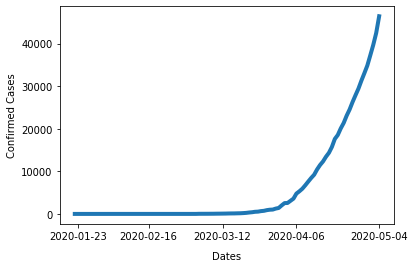

In [636]:
#Total number of days till 1st January
X=India['Date']
Y=India['Confirmed']

plt.xlabel('Dates',labelpad=10)
plt.ylabel('Confirmed Cases')
plt.xticks([1,25,50,75,X.shape[0]-1])
plt.plot(X,Y, linewidth=4)
plt.show()

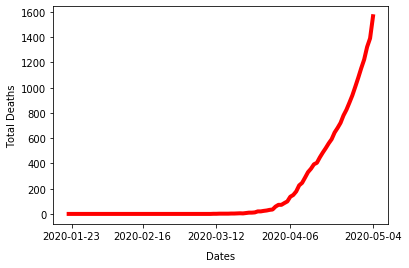

In [635]:
X=India['Date']
Y=India['Deaths']

plt.xlabel('Dates',labelpad=10)
plt.ylabel('Total Deaths')
plt.xticks([1,25,50,75,X.shape[0]-1])
plt.plot(X,Y,linewidth=4, color='red')
plt.show()

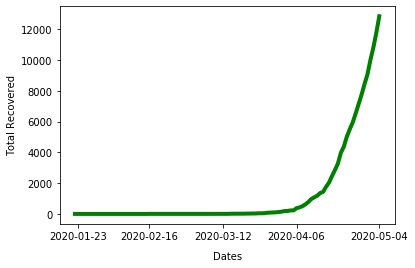

In [637]:
X=India['Date']
Y=India['Recovered']

plt.xlabel('Dates',labelpad=10)
plt.ylabel('Total Recovered')
plt.xticks([1,25,50,75,X.shape[0]-1])
plt.plot(X,Y,linewidth=4, color='green')
plt.show()